# includes

In [13]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc, DEF_INTERVAL, SYMBOL
from capture_plot import CaptureOnClick
# SYMBOLS = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT']

TOTAL_CANDLES = 100

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [14]:
print(mpf.__version__)

0.12.10b0


# simple flow

## Configure data input

### Presets

- SYMBOLS = 'BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT'
- INTERVALS = '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M'
- TOTAL_CANDLES = 100
- SYMBOL = 'BTCUSDT'
- DEF_INTERVAL ='15m'


SYMBOLS must be included into data_proc as well to create datastore structure (to be fixed)

In [15]:
#initialize data processor
dp = DataProc('.\\.data\\ntb\\v0.0504a\\')

print(dp)

#### Configure data

In [16]:

#datamap initialized with SYMBOLS entriesm  each may hold OCHL data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here, (TODO:and updated when needed )
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore[SYMBOL][DEF_INTERVAL])

#default load:
last_updated = datamap[SYMBOL][DEF_INTERVAL]['Updated']
start_date = datamap[SYMBOL][DEF_INTERVAL]['StartDate']
end_date = datamap[SYMBOL][DEF_INTERVAL]['EndDate']

total_candles = pd

print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval}, between: {start_date} and {end_date}, loaded on {last_updated}  \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')


we have: 100 candles of BTCUSDT at 15m, between: 2024-01-19 14:15:00 and 2024-01-20 15:00:00, loaded on 2024-01-20 17:08:59.877503  

(15, 4) (15, 4) (100, 5) 

DatetimeIndex(['2024-01-19 14:15:00', '2024-01-19 14:30:00',
               '2024-01-19 14:45:00', '2024-01-19 15:00:00',
               '2024-01-19 15:15:00'],
              dtype='datetime64[ns]', name='Date', freq=None) 

                         Open      High       Low     Close      Volume
Date                                                                   
2024-01-19 14:15:00  41292.44  41297.92  41045.11  41057.60   706.53690
2024-01-19 14:30:00  41057.59  41118.05  40912.63  40929.53  1275.44179
2024-01-19 14:45:00  40929.54  41127.89  40841.10  40969.31  1037.84364
2024-01-19 15:00:00  40969.31  41049.00  40845.00  40931.10   755.76414
2024-01-19 15:15:00  40931.10  41156.38  40789.33  40826.02  1128.24149 



#### Load data

In [17]:
# pair_df,_,_ = dp.get_data('BTCUSDT', '1h')
 
print(dp.pair_df)

(                         Open      High       Low     Close      Volume
Date                                                                   
2024-01-19 14:15:00  41292.44  41297.92  41045.11  41057.60   706.53690
2024-01-19 14:30:00  41057.59  41118.05  40912.63  40929.53  1275.44179
2024-01-19 14:45:00  40929.54  41127.89  40841.10  40969.31  1037.84364
2024-01-19 15:00:00  40969.31  41049.00  40845.00  40931.10   755.76414
2024-01-19 15:15:00  40931.10  41156.38  40789.33  40826.02  1128.24149
...                       ...       ...       ...       ...         ...
2024-01-20 14:00:00  41633.11  41646.00  41600.00  41609.18   138.85850
2024-01-20 14:15:00  41609.18  41614.77  41491.16  41559.99   222.09627
2024-01-20 14:30:00  41559.99  41572.00  41528.00  41528.38   270.75278
2024-01-20 14:45:00  41528.38  41591.00  41528.37  41542.99   163.85639
2024-01-20 15:00:00  41542.98  41550.42  41478.00  41495.14   198.61678

[100 rows x 5 columns], 'BTCUSDT', '15m')


## Aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

File '.\.data\ntb\v0.0504a\mBTCUSDT-15m-2024-01-20.pkl' does not exist. No marks loaded.


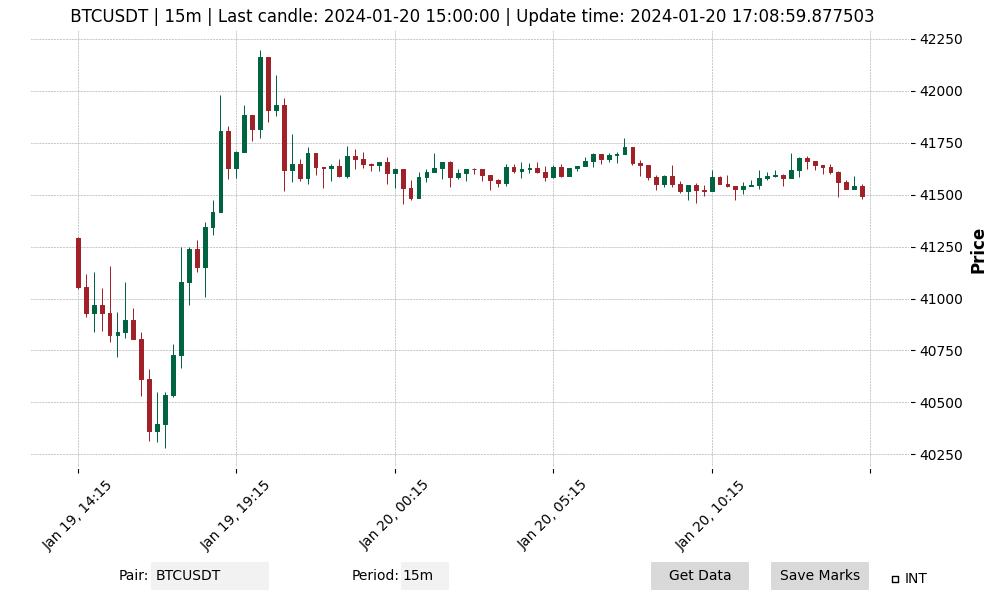

Clicked coords: (7.9719750000000005, 40535.58133333333, date: 2024-01-19 16:15:00)


f:\Data\projects\python\trp\capture_plot.py:393: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.marks_n = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


Clicked coords: (21.2256, 41912.39447488584, date: 2024-01-19 19:30:00)


In [18]:
plt = CaptureOnClick(data_proc=dp)
#plotter = CaptureOnClick(pair_df=pair_df, data_proc=dp)

## Utils. 
* Store selections

In [7]:
# Save points to file
# plotter.save_m_to_file()
# plt = plotter_default
print(f'Current pair: {plt.pair} current interval: {plt.interval}')


Current pair: BTCUSDT current interval: 15m


## debug print from chart, on mouse click 

In [8]:
print(plt.captured_output)

date: 2024-01-18 17:00:00, x_coord: 97


In [9]:
df = pd.DataFrame(datamap)

df = df.loc[:, df.notna().any()][:5]

print(df)

                                               BTCUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': 2024-01-17 16:45:00, 'EndDate': ...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               ETHUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               SOLUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'Start

In [11]:
del pd
del plt